In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
#tf.get_logger().setLevel('ERROR') # turn off tf warnings 
import tensorflow as tf
import glob
import warnings
warnings.filterwarnings("ignore")

# prepare numerical data

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


balanced class

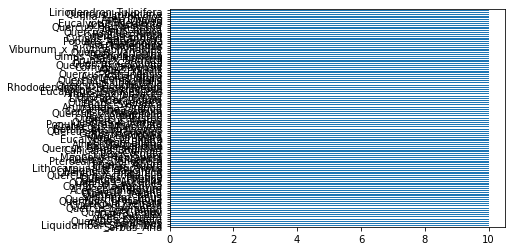

In [4]:
train['species'].value_counts().plot(kind = 'barh')
plt.show()

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


get x and y from raw data

In [7]:
Y_train_id = train.pop('id')

Y_train = train.pop('species')

test_id = test.pop('id')

X_train = train

X_test = test

normalize data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trainS = scaler.fit_transform(X_train)

X_testS = scaler.transform(X_test)

split training set to training and validation

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train_label = pd.Series(encoder.fit_transform(Y_train))

x_train, x_valid, y_train, y_valid =  train_test_split(X_trainS, y_train_label, test_size = 0.20, random_state = 233)

In [10]:
train_id = Y_train_id.loc[y_train.index]
train_species = Y_train.loc[y_train.index]

valid_id = Y_train_id.loc[y_valid.index]
valid_species = Y_train.loc[y_valid.index] 

ml example

In [11]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

clf1 = RandomForestClassifier(random_state=233, n_jobs=-1)

clf1.fit(x_train, y_train)

pred1 = clf1.predict(x_valid)

print(classification_report(y_true=y_valid, y_pred=pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         3
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00    

# image preparation

In [13]:
import shutil
#create folder
original_path = 'images'

new_path = 'splited_images'

os.mkdir(new_path) # create this folder

train_dir = os.path.join(new_path,'train')
valid_dir = os.path.join(new_path, 'validation')


os.mkdir(train_dir)
os.mkdir(valid_dir)

def create_species_folder(path):
    for specie in Y_train.unique():
        specie_path = os.path.join(path, specie)
        os.mkdir(specie_path)

create_species_folder(train_dir)
create_species_folder(valid_dir)

def copy_image(idx, species, path):
    for i in idx.index:
        name = '{}.jpg'.format(idx.loc[i])
        specie = species.loc[i]
        specie_path = os.path.join(path, specie)
        src = os.path.join(original_path, name)
        dst = os.path.join(specie_path, name)
        shutil.copyfile(src, dst)

copy_image(train_id, train_species, train_dir)
copy_image(valid_id, valid_species, valid_dir)



In [14]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                       shear_range = 0.5,
                                                       vertical_flip= True,
                                                       horizontal_flip = True)

In [15]:
target_size = (96, 96)
batch_size = 32
class_mode = 'categorical'

In [16]:
training_set = datagen.flow_from_directory(directory= train_dir, 
                                           target_size= target_size, 
                                           batch_size= batch_size, 
                                           class_mode= class_mode)

Found 792 images belonging to 99 classes.


In [17]:
valid_set = datagen.flow_from_directory(directory= valid_dir, 
                                        target_size= target_size, 
                                        batch_size= batch_size, 
                                        class_mode= class_mode)

Found 198 images belonging to 99 classes.


cnn example

In [18]:
#create a model
#kernal越小越好，activation最好是relu，，poolsize也是越小越好,stride减少可以增加train的accuracy，但是val_acc依然不好
def classifier():
    model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (2,2), input_shape = (96,96,3), activation = "relu" ,padding = 'Same', strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',padding = 'Same', strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',padding = 'Same', strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),

        #3层效果较好        
        keras.layers.Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu',padding = 'Same'),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
       
        
        
        keras.layers.Flatten(),
        keras.layers.Dense(units = 256, activation = 'relu'),
        #keras.layers.Dropout(0.5),
        #keras.layers.Dense(units = 128, activation = 'sigmoid'),
        keras.layers.Dense(units = 99, activation = 'softmax')
    ])
    return model

In [19]:
clf2 = classifier()

In [ ]:
clf2.summary

In [20]:
clf2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy') 

In [21]:
history = clf2.fit(training_set, validation_data=valid_set, epochs=10, batch_size=batch_size)

Epoch 1/10
25/25 [==============================] - 65s 3s/step - loss: 11.3649 - accuracy: 0.0101 - val_loss: 4.5951 - val_accuracy: 0.0202
Epoch 2/10
25/25 [==============================] - 65s 3s/step - loss: 4.5420 - accuracy: 0.0657 - val_loss: 4.3128 - val_accuracy: 0.0909
Epoch 3/10
25/25 [==============================] - 65s 3s/step - loss: 3.3053 - accuracy: 0.2816 - val_loss: 2.9024 - val_accuracy: 0.3182
Epoch 4/10
25/25 [==============================] - 65s 3s/step - loss: 1.5323 - accuracy: 0.6174 - val_loss: 2.5197 - val_accuracy: 0.3485
Epoch 5/10
25/25 [==============================] - 65s 3s/step - loss: 0.7788 - accuracy: 0.8068 - val_loss: 2.2387 - val_accuracy: 0.4293
Epoch 6/10
25/25 [==============================] - 64s 3s/step - loss: 0.3887 - accuracy: 0.9003 - val_loss: 2.3476 - val_accuracy: 0.4394
Epoch 7/10
25/25 [==============================] - 65s 3s/step - loss: 0.2461 - accuracy: 0.9394 - val_loss: 2.3269 - val_accuracy: 0.4141
Epoch 8/10
25/25 [=

In [18]:
def classifier():
    model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (2,2), input_shape = (96,96,3), activation = "relu" ,padding = 'Same',strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',padding = 'Same',strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',padding = 'Same',strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu',padding = 'Same',strides=(1,1)),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(units = 256, activation = 'relu'),
        keras.layers.Dense(units = 99, activation = 'softmax')
    ])
    return model

In [19]:
clf2 = classifier()

In [20]:
clf2.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [21]:
history = clf2.fit(training_set, validation_data=valid_set, epochs=10, batch_size=batch_size)

Epoch 1/10
25/25 [==============================] - 90s 4s/step - loss: 22.3222 - accuracy: 0.0215 - val_loss: 4.7083 - val_accuracy: 0.0202
Epoch 2/10
25/25 [==============================] - 92s 4s/step - loss: 4.0083 - accuracy: 0.1641 - val_loss: 3.3417 - val_accuracy: 0.1869
Epoch 3/10
25/25 [==============================] - 95s 4s/step - loss: 2.1911 - accuracy: 0.4747 - val_loss: 2.7288 - val_accuracy: 0.3232
Epoch 4/10
25/25 [==============================] - 96s 4s/step - loss: 1.4575 - accuracy: 0.6465 - val_loss: 2.2109 - val_accuracy: 0.3384
Epoch 5/10
25/25 [==============================] - 96s 4s/step - loss: 0.9794 - accuracy: 0.7462 - val_loss: 2.2628 - val_accuracy: 0.4192
Epoch 6/10
25/25 [==============================] - 97s 4s/step - loss: 0.8839 - accuracy: 0.7854 - val_loss: 1.8880 - val_accuracy: 0.4697
Epoch 7/10
25/25 [==============================] - 95s 4s/step - loss: 0.5077 - accuracy: 0.8775 - val_loss: 2.1393 - val_accuracy: 0.4242
Epoch 8/10
25/25 [=

In [26]:
def classifier():
    model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (2,2), input_shape = (96,96,3), activation = "relu" ,padding = 'Same'),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',padding = 'Same'),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',padding = 'Same'),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(2,2)),
        
        keras.layers.Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu',padding = 'Same'),
        keras.layers.MaxPooling2D(pool_size = (1,1), strides=(1,1)),
        
        keras.layers.Flatten(),
        keras.layers.Dense(units = 256, activation = 'relu'),
        keras.layers.Dense(units = 99, activation = 'softmax')
    ])
    return model

In [27]:
clf2 = classifier()

In [28]:
clf2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [29]:
history = clf2.fit(training_set, validation_data=valid_set, epochs=10, batch_size=batch_size)

Epoch 1/10
25/25 [==============================] - 20s 802ms/step - loss: 4.6070 - accuracy: 0.0038 - val_loss: 4.6016 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 19s 774ms/step - loss: 4.5812 - accuracy: 0.0177 - val_loss: 4.5910 - val_accuracy: 0.0152
Epoch 3/10
25/25 [==============================] - 20s 781ms/step - loss: 4.5620 - accuracy: 0.0290 - val_loss: 4.5792 - val_accuracy: 0.0152
Epoch 4/10
25/25 [==============================] - 20s 780ms/step - loss: 4.5210 - accuracy: 0.0442 - val_loss: 4.5762 - val_accuracy: 0.0303
Epoch 5/10
25/25 [==============================] - 19s 777ms/step - loss: 4.4629 - accuracy: 0.0467 - val_loss: 4.5602 - val_accuracy: 0.0202
Epoch 6/10
25/25 [==============================] - 20s 790ms/step - loss: 4.3893 - accuracy: 0.0606 - val_loss: 4.5195 - val_accuracy: 0.0404
Epoch 7/10
25/25 [==============================] - 20s 788ms/step - loss: 4.2646 - accuracy: 0.0859 - val_loss: 4.3644 - val_accuracy: 0.

In [22]:
print('accuracy is ', round(clf2.evaluate(valid_set, verbose =0)[1], 4))

accuracy is  0.4343


In [30]:
! pip install pydot

In [31]:
! pip install graphviz

'sudo' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


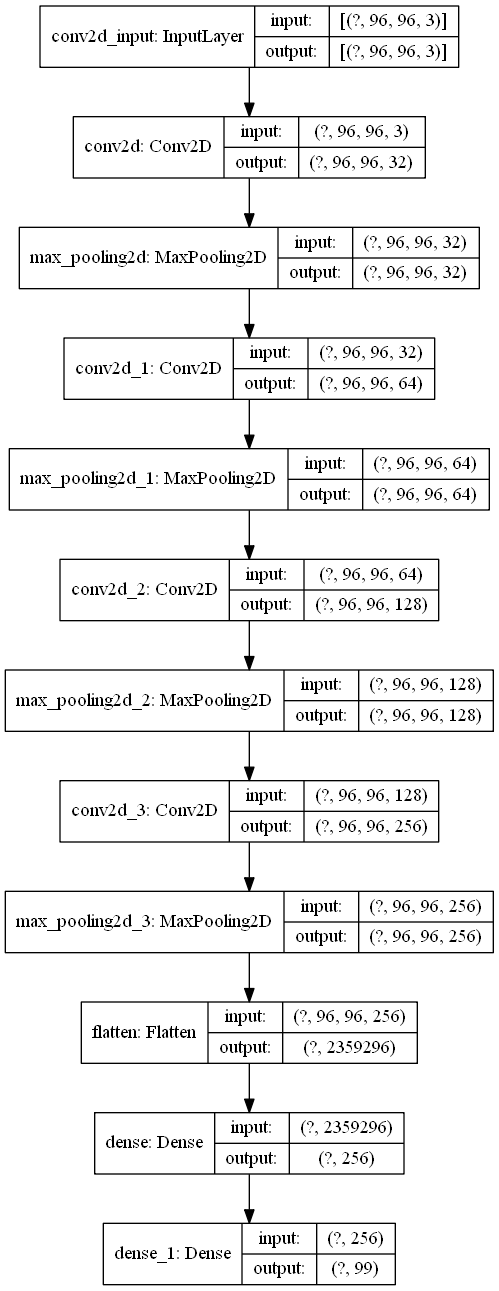

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(clf2,show_shapes= True, show_layer_names= True)

In [ ]:
###clf2.save("model_fitted.h5")

In [72]:
###
steps_per_epoch = [1,1,1,2,2,2,3,3,5,5]
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
acc = []


for i in range(0,len(steps_per_epoch)):
    model_i = classifier()
    model_i.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
    model_i.fit(training_set,steps_per_epoch=steps_per_epoch[i], epochs=epochs[i])
    model_name = "model_" +str(steps_per_epoch[i])+"_"+str(epochs[i])
    model_i.save(model_name)
    #load model
    model = load_model(model_name)
    data = []
    results = []
    for f1 in files:
        img = image.load_img(f1, target_size = (64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        data.append(img)
        result = model.predict(img)
        r = np.argmax(result, axis=1)
        results.append(r)

    results = list(np.concatenate(results))
    acc.append([steps_per_epoch[i], epochs[i], results])
###

1/1 [==============================] - 0s 997us/step - loss: 4.5984 - accuracy: 0.0000e+00
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_1_1\assets


NameError: name 'load_model' is not defined

In [22]:
def test_img(model):
    test_df = pd.DataFrame(columns= Y_train.unique())
    for i in test_id:
        name = '{}.jpg'.format(i)
        test_path = os.path.join(original_path, name) 
        img = keras.preprocessing.image.load_img(test_path, target_size = target_size)
        img = keras.preprocessing.image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        res = model.predict(img)
        test_df.loc[i] = res[0]
    
    return test_df

In [23]:
submission = test_img(clf2)

In [24]:
submission.head()

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
submission.apply(sum,axis=1)

4       1.0
7       1.0
9       1.0
12      1.0
13      1.0
       ... 
1576    1.0
1577    1.0
1579    1.0
1580    1.0
1583    1.0
Length: 594, dtype: float64